# PROYEK SAINS DATA EXTRAKSI CIRI AUDIO

## DESKRIPSI DAN INFORMASI DATASET

DATASET DIAMBIL DARI WEBSITE KAGGLE

https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess?resource=download

BUSINESS UNDERSTANDING - TUJUAN

Dataset ini bertujuan untuk memberikan bahan yang kaya dan bervariasi bagi peneliti atau praktisi dalam bidang pemrosesan suara dan analisis emosi untuk mengembangkan dan menguji model-model yang dapat mengenali dan memahami ekspresi emosi manusia berdasarkan sinyal audio.

DATA UNDERSTANDING - INFORMASI FITUR

Dataset audio yang digunakan untuk pengolahan ini terdiri dari 2810 rekaman suara manusia yang terstruktur dengan rapi dalam beberapa folder, mewakili berbagai ekspresi emosi manusia. Setiap folder menggambarkan kategori emosi tertentu, termasuk ‘sad’ (sedih), ‘pleasant_surprised’ (senang terkejut), ‘neutral’ (netral), ‘happy’ (bahagia), ‘fear’ (takut), ‘disgust’ (jijik), dan ‘angry’ (marah). Masing-masing folder ini mencakup variasi suara manusia yang berbeda, menciptakan keberagaman dalam ekspresi emosi.

Setiap rekaman audio dalam dataset ini memiliki berbagai fitur yang diekstrak dari sinyal audio. Fitur-fitur ini memberikan wawasan tentang karakteristik dan statistik sinyal audio, membantu dalam pemahaman dan pemodelan ekspresi emosi. Beberapa fitur utama yang diekstrak melibatkan Statistik frekuensi, Zero Crossing Rate (ZCR) dan Root Mean Square Energi (RMSE). Berikut adalah penjelasan singkat untuk masing-masing fitur :

Zero Crossing Rate (ZCR) :

ZCR Mean : Rata-rata tingkat perubahan tanda nol dalam sinyal audio.

ZCR Median : Nilai tengah dari tingkat perubahan tanda nol.

ZCR Std Dev : Deviasi standar dari tingkat perubahan tanda nol.

ZCR Kurtosis : Ukuran keruncingan distribusi tingkat perubahan tanda nol.

ZCR Skew : Ukuran kemiringan distribusi tingkat perubahan tanda nol.

Root Mean Square Error (RMSE) :

RMSE : Akar kuadrat dari rata-rata dari kuadrat perbedaan antara nilai-nilai aktual dan nilai-nilai yang diprediksi.

RMSE Median : Nilai tengah dari distribusi RMSE.

RMSE Std Dev : Deviasi standar dari distribusi RMSE.

RMSE Kurtosis : Ukuran keruncingan distribusi RMSE.

RMSE Skew : Ukuran kemiringan distribusi RMSE.

Label untuk setiap rekaman audio diambil dari nama folder tempat rekaman tersebut disimpan, mencerminkan kategori emosi yang tercermin dalam rekaman tersebut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/pertemuan 4

Mounted at /content/drive
/content/drive/MyDrive/pertemuan 4


In [ ]:
%%capture
pip install librosa

## **Import pustaka python**
1.   librosa untuk analisis audio (mengambil fitur audio, memvisualisasikan audio, dan lainnya.)
2.   matplotlib dan seaborn untuk visualisasi (membuat grafik dan plot)
2.   numpy untuk operasi matematika
1.   scipy.stats untuk statistik
2.   pandas untuk manipulasi data (dalam bentuk dataframe)
1.   os untuk interaksi dengan sistem operasi (mengakses file dan direktori)


In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import IPython
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd
import os

## **Fungsi untuk menghitung statistik frekuensi**
fungsi describe_freq yang digunakan untuk menghitung berbagai statistik dasar dari data frekuensi. Statistik yang dihitung meliputi rata-rata, standar deviasi, nilai maksimum, nilai minimum, median, skewness, kurtosis, kuartil pertama, kuartil ketiga, modus, dan jangkauan antarkuartil. Fungsi ini mengembalikan statistik-statistik ini dalam bentuk daftar (list).

In [ ]:
# Fungsi untuk menghitung statistik frekuensi
def describe_freq(x):
    mean = np.mean(x)
    std = np.std(x)
    maxv = np.amax(x)
    minv = np.amin(x)
    median = np.median(x)
    skew = scipy.stats.skew(x)
    kurt = scipy.stats.kurtosis(x)
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    mode = scipy.stats.mode(x)[0]
    iqr = scipy.stats.iqr(x)
    return [mean, median, mode, maxv, minv, std, skew, kurt, q1, q3, iqr]


## **Fungsi untuk menghitung zero crossig rate**
menghitung statistik Zero Crossing Rate (ZCR) dari suatu sinyal audio. Zero Crossing Rate mengukur seberapa sering suara atau sinyal berubah dari positif ke negatif atau sebaliknya dalam suatu periode waktu tertentu. Statistik yang dihitung dalam fungsi ini meliputi rata-rata (mean), median, deviasi standar (standard deviation), kurtosis, dan skewness dari ZCR sinyal audio.\
Rumus ZCR yakni : ZCR = (1 / N) * Σ |x[i] - x[i-1]|

In [ ]:
# Fungsi untuk menghitung statistik ZCR
def describe_zcr(x):
    zcr = librosa.feature.zero_crossing_rate(x)
    mean_zcr = np.mean(zcr)
    median_zcr = np.median(zcr)
    std_zcr = np.std(zcr)
    kurtosis_zcr = scipy.stats.kurtosis(zcr, axis=None)
    skew_zcr = scipy.stats.skew(zcr, axis=None)
    return [mean_zcr, median_zcr, std_zcr, kurtosis_zcr, skew_zcr]

## **Fungsi untuk menghitung RMS (Root Mean Square) energi signal**
RMS (Root Mean Square) adalah metrik yang digunakan untuk mengukur besaran magnitude dari sejumlah nilai seperti amplitudo gelombang audio atau sinyal.\
Jadi pada kode ini semua elemen sinyal audio dipangkatkan dua, kemudian diambil rata-rata dari hasil tersebut, dan diambil akar kuadratnya. Ini menghasilkan nilai RMS, yang mengukur besarnya amplitudo rata-rata sinyal audio.\
Rumus Root Mean Square adalah:

RMS = sqrt((1/n) * Σ(xi^2))


In [ ]:
# Fungsi untuk menghitung statistik energi RMS
def describe_energy_rms(x):
    n = len(x)
    mean_rms = np.sqrt(np.mean(x**2) / n)
    median_rms = np.sqrt(np.median(x**2) / n)
    skew_rms = np.sqrt(scipy.stats.skew(x**2) / n)
    kurtosis_rms = np.sqrt(scipy.stats.kurtosis(x**2) / n)
    std_rms = np.sqrt(np.std(x**2) / n)
    return [mean_rms, median_rms, std_rms, kurtosis_rms, skew_rms]


# **Ekstraksi fitur dari sejumlah file audio dalam berbagai folder**
File audio akan dicari statistiknya. Fitur-fitur yang diekstraksi termasuk statistik dari frekuensi, statistik Zero Crossing Rate (ZCR), dan statistik energi Root Mean Square Error (RMSE) dari setiap file audio.

In [ ]:
# Daftar folder yang berisi file-file audio yang akan diolah. Setiap folder mewakili kategori atau label yang berbeda untuk data audio.
folder_paths = [
    'Orang 2_pleasant_surprise', 'Orang 2_happy', 'Orang 1_sad', 'Orang 1_neutral',  'Orang 2_disgust', 'Orang 2_fear', 'Orang 1_pleasant_surprise',
    'Orang 1_disgust', 'Orang 1_happy', 'Orang 1_fear', 'Orang 2_angry', 'Orang 2_neutral', 'Orang 2_sad', 'Orang 1_angry'
]


# Inisialisasi list yang akan digunakan untuk menyimpan hasil ekstraksi fitur dari file audio.
results = []

# Loop pertama (Loop ini akan melalui setiap folder dalam folder_paths)
for folder_path in folder_paths:
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')] # file audio dalam folder tertentu yang memiliki ekstensi .wav. File audio akan dibaca dan diolah satu per satu.

    # Loop kedua (Loop ini akan melalui setiap file audio dalam folder yang sedang diproses)
    for audio_file in audio_files:
        # Membaca file audio (File audio dibaca menggunakan librosa dan disimpan dalam variabel x. Juga, frekuensi sampelnya disimpan dalam variabel sr)
        audio_path = os.path.join(folder_path, audio_file)
        x, sr = librosa.load(audio_path)

        # Menghitung statistik audio frekuensi
        # freqs_x = np.fft.fftfreq(x.size)
        freq_stats_x = describe_freq(x)

        # Menghitung statistik Zero Crossing Rate
        zcr_stats = describe_zcr(x)

        # Menghitung statistik energi Root Mean Square (RMS)
        energy_rms_stats = describe_energy_rms(x)

        # Mendefinisikan Label (Label untuk file audio ini diambil dari nama folder yang sesuai)
        label = folder_path

        # Menambahkan hasil statistik ke dalam list
        result = {
            'Audio Mean': freq_stats_x[0],
            'Audio Median': freq_stats_x[1],
            'Audio Mode': freq_stats_x[2],
            'Audio Maxv': freq_stats_x[3],
            'Audio Minv': freq_stats_x[4],
            'Audio Std': freq_stats_x[5],
            'Audio Skew': freq_stats_x[6],
            'Audio Kurtosis': freq_stats_x[7],
            'Audio Q1': freq_stats_x[8],
            'Audio Q3': freq_stats_x[9],
            'Audio IQR': freq_stats_x[10],
            'ZCR Mean': zcr_stats[0],
            'ZCR Median': zcr_stats[1],
            'ZCR Std': zcr_stats[2],
            'ZCR Kurtosis': zcr_stats[3],
            'ZCR Skew': zcr_stats[4],
            'RMS Energi Mean': energy_rms_stats[0],
            'RMS Energi Median': energy_rms_stats[1],
            'RMS Energi Std': energy_rms_stats[2],
            'RMS Energi Kurtosis': energy_rms_stats[3],
            'RMS Energi Skew': energy_rms_stats[4],
            'Label': label
        }
        results.append(result)

# **Menyimpan hasil ekstraksi fitur ke dalam csv**

In [ ]:
# Buat DataFrame dari hasil statistik
df = pd.DataFrame(results)

# Simpan DataFrame ke dalam file CSV
file_statitstik = df.to_csv('hasil_statistik2.csv', index=False)

# **Menampilkan data CSV**

In [ ]:
df

,Audio Mean,Audio Median,Audio Mode,Audio Maxv,Audio Minv,Audio Std,Audio Skew,Audio Kurtosis,Audio Q1,Audio Q3,...,ZCR Median,ZCR Std,ZCR Kurtosis,ZCR Skew,RMS Energi Mean,RMS Energi Median,RMS Energi Std,RMS Energi Kurtosis,RMS Energi Skew,Label
0,-0.000046,0.000201,-0.013377,0.199650,-0.205005,0.029604,-0.119352,5.005181,-0.011784,0.011482,...,0.098389,0.223898,1.609658,1.699007,0.000149,0.000058,0.000242,0.044044,0.013404,Orang 2_pleasant_surprise
1,-0.000049,0.000410,-0.071986,0.174206,-0.193903,0.037168,-0.173890,2.929447,-0.014112,0.015798,...,0.102295,0.212312,1.562230,1.636626,0.000184,0.000074,0.000275,0.024870,0.010385,Orang 2_pleasant_surprise
2,-0.000020,-0.000190,-0.017790,0.284378,-0.231046,0.041332,0.292197,5.688801,-0.013858,0.010074,...,0.081543,0.213992,3.619491,2.209202,0.000185,0.000056,0.000309,0.031588,0.010828,Orang 2_pleasant_surprise
3,-0.000023,-0.000101,-0.131112,0.259005,-0.202766,0.046236,0.413269,3.771249,-0.013435,0.011271,...,0.111816,0.210906,3.029781,2.078468,0.000209,0.000057,0.000325,0.022939,0.009429,Orang 2_pleasant_surprise
4,-0.000042,0.000164,-0.036222,0.234862,-0.213870,0.036638,0.076143,4.718775,-0.012012,0.011886,...,0.095703,0.223349,2.687882,2.017582,0.000182,0.000059,0.000293,0.033031,0.011751,Orang 2_pleasant_surprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.000153,-0.000771,-0.046064,0.247951,-0.260921,0.049737,-0.024760,3.389052,-0.013146,0.013442,...,0.055420,0.088571,4.139827,2.164058,0.000281,0.000075,0.000427,0.025640,0.011307,Orang 1_angry
2796,-0.000010,-0.000300,-0.039749,0.262819,-0.249466,0.041748,0.041511,5.171020,-0.011494,0.012832,...,0.060059,0.118703,3.370580,2.012270,0.000226,0.000065,0.000370,0.034970,0.012768,Orang 1_angry
2797,-0.000097,-0.000367,-0.038133,0.279945,-0.249809,0.056364,0.118050,3.098673,-0.013722,0.014423,...,0.054443,0.112813,3.240120,1.992513,0.000296,0.000074,0.000444,0.021302,0.010032,Orang 1_angry
2798,-0.000041,0.000115,-0.088468,0.255944,-0.269486,0.041024,-0.018905,7.120251,-0.008630,0.009383,...,0.084473,0.095373,1.956955,1.531248,0.000213,0.000047,0.000370,0.033465,0.012284,Orang 1_angry


# **Normalisasi Data**

### Melihat mean dan standar devisiasi setiap kolom

In [ ]:
# Menghitung mean dan standar deviasi setiap kolom
cekmean = df.mean()
cekstd_deviation = df.std()

# Menampilkan hasil
print("Mean:")
print(cekmean)

print("\nStandar Deviasi:")
print(cekstd_deviation)

Mean:
Audio Mean            -0.000015
Audio Median           0.000538
Audio Mode            -0.048706
Audio Maxv             0.210145
Audio Minv            -0.232112
Audio Std              0.037943
Audio Skew            -0.324488
Audio Kurtosis         4.335692
Audio Q1              -0.010863
Audio Q3               0.013535
Audio IQR              0.024397
ZCR Mean               0.145877
ZCR Median             0.067428
ZCR Std                0.180969
ZCR Kurtosis           2.823296
ZCR Skew               1.969139
RMS Energi Mean        0.000183
RMS Energi Median      0.000060
RMS Energi Std         0.000291
RMS Energi Kurtosis    0.029415
RMS Energi Skew        0.010698
dtype: float64

Standar Deviasi:
Audio Mean             0.000053
Audio Median           0.000724
Audio Mode             0.048546
Audio Maxv             0.163219
Audio Minv             0.171694
Audio Std              0.023685
Audio Skew             0.436796
Audio Kurtosis         3.588586
Audio Q1               0.005547
A

<ipython-input-10-79b0125830d8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cekmean = df.mean()
<ipython-input-10-79b0125830d8>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cekstd_deviation = df.std()


## **Normalisasi Data Zscore**
Normalisasi Z-score adalah suatu metode statistik yang digunakan untuk mengubah dan mengukur seberapa jauh sebuah titik data dari rata-rata (mean) dalam satu set data tertentu, dalam satuan standar deviasi (standard deviation) dari data tersebut. Tujuan normalisasi Z-score adalah untuk mengubah distribusi data menjadi distribusi dengan rata-rata 0 dan standar deviasi 1.\
Rumus normalisasi Z-score :\
z = (x-μ)/σ


*   Z adalah nilai Z-score yang telah dinormalisasi.
*   x adalah nilai titik data yang ingin dinormalisasi.
*   μ (mu) adalah rata-rata (mean) dari seluruh data dalam distribusi.
*   σ (sigma) adalah standar deviasi dari seluruh data dalam distribusi.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Membaca data dari file CSV
df = pd.read_csv('hasil_statistik2.csv')

# Memisahkan kolom target (label) dari kolom fitur
X = df.drop(columns=['Label'])  # Kolom fitur
y = df['Label']  # Kolom target

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi Z-score pada data training
zscore_scaler = StandardScaler()
X_train_zscore = zscore_scaler.fit_transform(X_train)


# Simpan hasil normalisasi data training ke dalam file pickle
with open('zscore_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(X_train_zscore, scaler_file)

# Membuat DataFrame dari data hasil normalisasi Z-score
normalized_data_zscore = pd.DataFrame(X_train_zscore, columns=X_train.columns)

# Menambahkan kolom target (label) ke DataFrame hasil normalisasi Z-score
normalized_data_zscore['Label'] = y_train

# Menampilkan data hasil normalisasi Z-score
print("Data Hasil Normalisasi Z-score:")
normalized_data_zscore


Data Hasil Normalisasi Z-score:


,Audio Mean,Audio Median,Audio Mode,Audio Maxv,Audio Minv,Audio Std,Audio Skew,Audio Kurtosis,Audio Q1,Audio Q3,...,ZCR Median,ZCR Std,ZCR Kurtosis,ZCR Skew,RMS Energi Mean,RMS Energi Median,RMS Energi Std,RMS Energi Kurtosis,RMS Energi Skew,Label
0,-0.420108,0.054481,0.692683,-0.995221,1.036450,-1.109401,0.203627,-0.897438,1.032997,-1.031015,...,-0.999644,-0.732594,0.092192,0.227160,-1.115070,-1.080961,-1.112078,-1.221018,-1.632746,Orang 2_pleasant_surprise
1,0.057859,-0.950448,0.195845,0.071285,-0.150218,-0.174776,1.752188,0.715313,0.580247,-1.073160,...,0.818656,0.892598,-0.610861,-0.624582,-0.310425,-0.907288,-0.204275,0.124225,-0.053003,Orang 2_pleasant_surprise
2,-0.617510,-0.542652,0.706021,0.389313,-0.172899,0.215704,0.851265,0.177375,0.179962,-0.449226,...,1.112903,0.951946,-1.151458,-1.379028,0.224335,-0.316233,0.244509,0.268440,0.433589,Orang 2_pleasant_surprise
3,-0.350564,0.040184,0.532194,-0.696983,0.681671,-0.720500,-0.763696,-0.393193,0.606208,-0.427797,...,-0.826113,-0.524064,0.254987,0.504670,-0.679175,-0.473591,-0.689001,-0.053295,0.108749,Orang 2_pleasant_surprise
4,-0.589496,-0.020105,0.158169,-0.424794,0.274301,-0.559227,-0.847941,0.494690,0.518921,-0.548624,...,-0.690306,-0.401753,-0.783577,-0.686314,-0.617699,-0.604084,-0.537838,0.497386,0.351270,Orang 2_pleasant_surprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.321962,-0.111267,0.367306,-0.818607,0.716128,-0.790571,-1.190668,-0.336104,0.994825,-0.659096,...,-0.086722,0.273158,-1.691273,-1.925812,-0.772245,-0.785112,-0.766258,-0.305036,-0.248503,Orang 2_neutral
2236,-0.910432,-0.464837,1.151230,1.153844,-1.409539,1.157239,-0.620844,0.845902,-0.921873,0.756414,...,2.599231,0.613101,-1.258888,-1.631203,1.168366,0.837414,1.340336,0.912417,1.194913,Orang 2_neutral
2237,0.117973,-0.305453,-0.115825,1.618567,-1.147424,1.200494,-0.204795,0.345036,-0.910279,0.890562,...,1.188352,0.091066,0.243999,0.038697,1.315873,1.002895,1.351372,0.503788,0.824515,Orang 2_neutral
2238,0.588100,-0.251576,-0.429990,-0.273974,0.155012,-0.427308,-1.092135,-0.014183,0.311806,0.120695,...,-0.531865,-0.459613,0.215152,0.380872,-0.366512,0.001950,-0.352241,1.099265,1.214962,Orang 2_neutral


In [ ]:
# Menyimpan data hasil normalisasi Z-score ke dalam file CSV
normzscore = normalized_data_zscore.to_csv('hasil_normalisasi_zscore.csv', index=False)

## Zscore+KNN Tanpa Reduksi

In [ ]:
# membuka data hasil normalisasi
with open('zscore_scaler.pkl', 'rb') as scaler_file:
    normalisasizscore = pickle.load(scaler_file)

# Membuat daftar nilai k dari 1 hingga 50
k_values = list(range(1, 51))

# Membuat dictionary untuk menyimpan akurasi untuk setiap nilai k
accuracy_dict = {}

# Melakukan loop untuk mencoba setiap nilai k
for k in k_values:
    # Mendefinisikan dan melatih model KNN
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(normalisasizscore, y_train)

    # Normalisasi Z-score pada data testing
    X_test_zscore = zscore_scaler.fit_transform(X_test)
    # Melakukan prediksi pada data testing yang telah dinormalisasi
    y_pred = knn_model.predict(X_test_zscore)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test, y_pred)

    # Menyimpan akurasi dalam dictionary
    accuracy_dict[k] = accuracy

# Menampilkan akurasi untuk setiap nilai k
for k, accuracy in accuracy_dict.items():
    print(f"Akurasi Model dengan k={k}: {accuracy:.4f}")

# Mencari nilai k terbaik
best_k = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy_knnbiasa = accuracy_dict[best_k] *100

print(f"\nJadi nilai akurasi terbaik yakni ada pada K {best_k} dengan akurasi sebesar {best_accuracy_knnbiasa:.2f}%")

# Simpan model KNN dan hasil akurasi terbaik ke dalam file pickle
with open('zscore knn model.pkl', 'wb') as file:
    pickle.dump((knn_model, best_k), file)

Akurasi Model dengan k=1: 0.7732
Akurasi Model dengan k=2: 0.7214
Akurasi Model dengan k=3: 0.7679
Akurasi Model dengan k=4: 0.7750
Akurasi Model dengan k=5: 0.7714
Akurasi Model dengan k=6: 0.7768
Akurasi Model dengan k=7: 0.7893
Akurasi Model dengan k=8: 0.7786
Akurasi Model dengan k=9: 0.7696
Akurasi Model dengan k=10: 0.7732
Akurasi Model dengan k=11: 0.7768
Akurasi Model dengan k=12: 0.7821
Akurasi Model dengan k=13: 0.7893
Akurasi Model dengan k=14: 0.7893
Akurasi Model dengan k=15: 0.7964
Akurasi Model dengan k=16: 0.7839
Akurasi Model dengan k=17: 0.7857
Akurasi Model dengan k=18: 0.7821
Akurasi Model dengan k=19: 0.7750
Akurasi Model dengan k=20: 0.7821
Akurasi Model dengan k=21: 0.7750
Akurasi Model dengan k=22: 0.7696
Akurasi Model dengan k=23: 0.7661
Akurasi Model dengan k=24: 0.7714
Akurasi Model dengan k=25: 0.7661
Akurasi Model dengan k=26: 0.7714
Akurasi Model dengan k=27: 0.7768
Akurasi Model dengan k=28: 0.7732
Akurasi Model dengan k=29: 0.7607
Akurasi Model dengan k=

## Prediksi KNN

In [ ]:
# Load data tes prediksi memakai suara mubes
df_tes = pd.read_csv('tes suara prediksi.csv')
df_tes

,Audio Mean,Audio Median,Audio Mode,Audio Maxv,Audio Minv,Audio Std,Audio Skew,Audio Kurtosis,Audio Q1,Audio Q3,...,ZCR Median,ZCR Std,ZCR Kurtosis,ZCR Skew,RMS Energi Mean,RMS Energi Median,RMS Energi Std,RMS Energi Kurtosis,RMS Energi Skew,Label
0,-0.000007,-0.00096,-0.10141,0.40527,-0.238503,0.071989,1.190213,3.795624,-0.033727,0.013462,...,0.039551,0.102754,6.855275,2.712728,0.0003,0.000103,0.000465,0.022387,0.009064,tes suara mubes


In [ ]:
# load model KNN dari file pickle
with open('zscore knn model.pkl', 'rb') as file:
    knn_model, best_k = pickle.load(file)

# load data CSV
df_new = pd.read_csv('tes suara prediksi.csv')

# Hapus kolom label untuk membuat data yang akan dijadikan input prediksi
X_new = df_new.drop(columns=['Label'])

# prediksi
y_pred_new = knn_model.set_params(n_neighbors=best_k).predict(X_new)

np.set_printoptions(threshold=np.inf)

# hasil prediksi
print("Hasil Prediksi:")
print(y_pred_new)


Hasil Prediksi:
['Orang 1_angry']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## Reduksi Data (Zscore+KNN dengan PCA)

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Melakukan PCA dengan nilai n_components dari 20 sampai 1
best_n_components = 0
best_k = 0
best_accuracy_knn_pca = 0

for n_components in range(20, 0, -1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(normalisasizscore)
    X_test_pca = pca.transform(X_test_zscore)

    # Membuat daftar nilai k dari 1 hingga 50
    k_values = list(range(1, 51))

    # Membuat variabel untuk menyimpan akurasi terbaik dan nilai k terbaik untuk n_components saat ini
    local_best_accuracy = 0
    local_best_k = 0

    # Melakukan loop untuk mencoba setiap nilai k
    for k in k_values:
        # Mendefinisikan dan melatih model KNN
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train_pca, y_train)  # Menggunakan data yang telah direduksi oleh PCA

        # Melakukan prediksi pada data testing yang telah direduksi oleh PCA
        y_pred = knn_model.predict(X_test_pca)

        # Mengukur akurasi model
        accuracy = accuracy_score(y_test, y_pred)

        # Memperbarui nilai k terbaik jika ditemukan akurasi yang lebih tinggi
        if accuracy > local_best_accuracy:
            local_best_accuracy = accuracy
            local_best_k = k

    # Menampilkan hasil terbaik untuk setiap n_components
    print(f"Untuk n_components = {n_components}, K terbaik adalah {local_best_k} dengan akurasi {local_best_accuracy:.4f}")

    # Memperbarui nilai n_components terbaik jika ditemukan akurasi yang lebih tinggi
    if local_best_accuracy > best_accuracy_knn_pca:
        best_accuracy_knn_pca = local_best_accuracy
        best_k = local_best_k
        best_n_components = n_components

# Menampilkan hasil terbaik secara keseluruhan
print(f"\nJadi nilai akurasi terbaik ada pada n_components {best_n_components}, dengan nilai K {best_k} dan hasil akurasi sebesar {best_accuracy_knn_pca*100:.2f}%")


Untuk n_components = 20, K terbaik adalah 15 dengan akurasi 0.7964
Untuk n_components = 19, K terbaik adalah 15 dengan akurasi 0.7964
Untuk n_components = 18, K terbaik adalah 15 dengan akurasi 0.7964
Untuk n_components = 17, K terbaik adalah 15 dengan akurasi 0.7964
Untuk n_components = 16, K terbaik adalah 15 dengan akurasi 0.7964
Untuk n_components = 15, K terbaik adalah 15 dengan akurasi 0.7982
Untuk n_components = 14, K terbaik adalah 15 dengan akurasi 0.8000
Untuk n_components = 13, K terbaik adalah 15 dengan akurasi 0.7964
Untuk n_components = 12, K terbaik adalah 13 dengan akurasi 0.7893
Untuk n_components = 11, K terbaik adalah 17 dengan akurasi 0.7839
Untuk n_components = 10, K terbaik adalah 8 dengan akurasi 0.7750
Untuk n_components = 9, K terbaik adalah 12 dengan akurasi 0.7661
Untuk n_components = 8, K terbaik adalah 9 dengan akurasi 0.7554
Untuk n_components = 7, K terbaik adalah 21 dengan akurasi 0.7107
Untuk n_components = 6, K terbaik adalah 27 dengan akurasi 0.6768
U

## Zscore+KNN dengan Grid Search PCA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Mendefinisikan parameter yang ingin diuji
param_grid = {
    'n_neighbors': list(range(1, 51)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Mendefinisikan model KNN
knn = KNeighborsClassifier()

# Mendefinisikan Grid Search dengan model KNN dan parameter yang diuji
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Menggunakan X_train tanpa PCA

# Menampilkan parameter terbaik
print("Parameter terbaik :", grid_search.best_params_)

# Menggunakan PCA dengan komponen utama terbaik
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
best_metric = grid_search.best_params_['metric']

# Menghitung PCA dengan jumlah komponen sesuai jumlah fitur
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(normalisasizscore)
X_test_pca = pca.transform(X_test_zscore)

# Membuat model KNN dengan hyperparameter terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, metric=best_metric)
best_knn_model.fit(X_train_pca, y_train)

# Membuat prediksi menggunakan model terbaik
y_pred = best_knn_model.predict(X_test_pca)

# Mengukur akurasi model terbaik pada data testing
grid_knn_pca = accuracy_score(y_test, y_pred)
print(f"Akurasi Reduksi Data Zscore + KNN setelah Grid Search: {grid_knn_pca*100:.2f}%")


Parameter terbaik : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi Reduksi Data Zscore + KNN setelah Grid Search: 81.25%


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.decomposition import PCA
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Mendefinisikan parameter yang ingin diuji
# param_grid = {
#     'n_neighbors': list(range(1, 51)),
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# # Mendefinisikan model KNN
# knn = KNeighborsClassifier()

# # Mendefinisikan Grid Search dengan model KNN dan parameter yang diuji
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)  # Menggunakan X_train tanpa PCA

# # Menampilkan parameter terbaik
# print("Parameter terbaik :", grid_search.best_params_)

# # Menggunakan PCA dengan komponen utama terbaik
# best_n_neighbors = grid_search.best_params_['n_neighbors']
# best_weights = grid_search.best_params_['weights']
# best_metric = grid_search.best_params_['metric']

# accuracy_dict = {}
# for n_components in range(20, 0, -1):
#     pca = PCA(n_components=n_components)
#     X_train_pca = pca.fit_transform(normalisasizscore)
#     X_test_pca = pca.transform(X_test_zscore)

#     # Membuat model KNN dengan hyperparameter terbaik
#     best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, metric=best_metric)
#     best_knn_model.fit(X_train_pca, y_train)

#     # Membuat prediksi menggunakan model terbaik
#     y_pred = best_knn_model.predict(X_test_pca)

#     # Mengukur akurasi model terbaik pada data testing
#     grid_knn_pca = accuracy_score(y_test, y_pred)

#     # Menyimpan akurasi dalam dictionary
#     accuracy_dict[n_components] = grid_knn_pca

#     print(f"Akurasi Reduksi Data Zscore + KNN setelah Grid Search: {grid_knn_pca*100:.2f}%")

# # Mencari nilai k terbaik
# best_acc = max(accuracy_dict, key=accuracy_dict.get)
# best_accuracy = accuracy_dict[n_components] *100
# print(f"\nAkurasi Terbaik Reduksi Data Zscore + KNN setelah Grid Search: {best_accuracy:.2f}%")

## Perbandingan Hasil Akurasi Antara Metode KNN

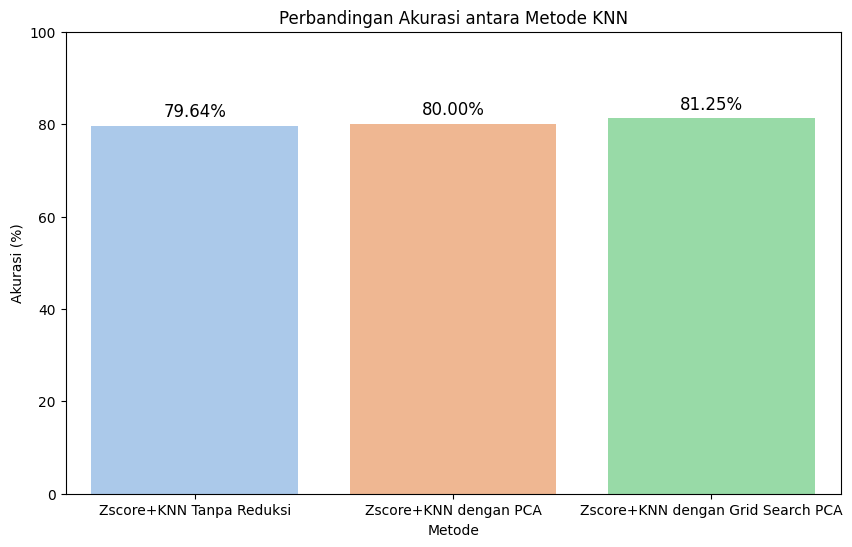

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar metode yang akan dibandingkan
methods = ['Zscore+KNN Tanpa Reduksi', 'Zscore+KNN dengan PCA', 'Zscore+KNN dengan Grid Search PCA']

# Daftar akurasi dari setiap metode
accuracies = [best_accuracy_knnbiasa, best_accuracy_knn_pca*100, grid_knn_pca*100]

# Membuat dataframe dari data
data = {'Metode': methods, 'Akurasi (%)': accuracies}
df = pd.DataFrame(data)

# Membuat grafik bar dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metode', y='Akurasi (%)', data=df, palette='pastel')
plt.xlabel('Metode')
plt.ylabel('Akurasi (%)')
plt.title('Perbandingan Akurasi antara Metode KNN')
plt.ylim(0, 100)  # Mengatur batas akurasi dari 0% hingga 100%

# Menambahkan nilai-nilai akurasi di atas setiap batang
for index, value in enumerate(accuracies):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center', fontsize=12)

plt.show()


## **Normalisasi Data MinMax**
Normalisasi Min-Max adalah salah satu teknik normalisasi yang digunakan dalam pemrosesan data untuk mengubah rentang nilai dalam suatu atribut (kolom) menjadi rentang nilai tertentu, biasanya antara 0 dan 1. Tujuan utama normalisasi Min-Max adalah untuk menjaga proporsi relatif antara nilai-nilai dalam kolom yang berbeda dan menghindari masalah dengan skala yang berbeda dalam data. Cara kerjanya setiap nilai pada sebuah fitur dikurangi dengan nilai minimum fitur tersebut, kemudian dibagi dengan rentang nilai atau nilai maksimum dikurangi nilai minimum dari fitur tersebut.\
Rumus normalisasi minmax :\
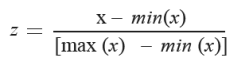\
*   z adalah nilai yang sudah dinormalisasi
*   x adalah nilai asli sebelum dinormalisasi
*   min(x)dalah nilai minimum dalam atribut tersebut.
*   max(x)adalah nilai maksimum dalam atribut tersebut.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Membaca data dari file CSV
df = pd.read_csv('hasil_statistik2.csv')

# Memisahkan kolom target (label) dari kolom fitur
X = df.drop(columns=['Label'])  # Kolom fitur
y = df['Label']  # Kolom target

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi Min-Max Scaling pada data training
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)

# Simpan skaler ke dalam file menggunakan pickle
with open('minmax_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(X_train_minmax, scaler_file)

# Membuat DataFrame dari data hasil normalisasi Min-Max Scaling
normalized_data_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)

# Menambahkan kolom target (label) ke DataFrame hasil normalisasi Min-Max Scaling
normalized_data_minmax['Label'] = y_train

# Menampilkan data hasil normalisasi Min-Max Scaling
print("\nData Hasil Normalisasi Min-Max Scaling:")
normalized_data_minmax




Data Hasil Normalisasi Min-Max Scaling:


,Audio Mean,Audio Median,Audio Mode,Audio Maxv,Audio Minv,Audio Std,Audio Skew,Audio Kurtosis,Audio Q1,Audio Q3,...,ZCR Median,ZCR Std,ZCR Kurtosis,ZCR Skew,RMS Energi Mean,RMS Energi Median,RMS Energi Std,RMS Energi Kurtosis,RMS Energi Skew,Label
0,0.521872,0.261029,0.805727,0.017600,0.977957,0.023725,0.356807,0.024907,0.952194,0.048721,...,0.067227,0.330911,0.375023,0.555452,0.018463,0.029091,0.012434,0.069409,0.068824,Orang 2_pleasant_surprise
1,0.555674,0.179092,0.753690,0.199696,0.765745,0.191688,0.525483,0.113040,0.897176,0.042936,...,0.356543,0.644433,0.251561,0.395791,0.156059,0.049255,0.171751,0.215899,0.271074,Orang 2_pleasant_surprise
2,0.507912,0.212342,0.807124,0.253997,0.761689,0.261862,0.427350,0.083643,0.848533,0.128582,...,0.403361,0.655882,0.156627,0.254368,0.247504,0.117878,0.250512,0.231604,0.333371,Orang 2_pleasant_surprise
3,0.526790,0.259863,0.788918,0.068521,0.914511,0.093615,0.251442,0.052463,0.900331,0.131524,...,0.094838,0.371140,0.403612,0.607472,0.093002,0.099608,0.086683,0.196568,0.291783,Orang 2_pleasant_surprise
4,0.509893,0.254948,0.749744,0.114995,0.841662,0.122597,0.242265,0.100984,0.889723,0.114938,...,0.116447,0.394735,0.221230,0.384219,0.103515,0.084458,0.113212,0.256535,0.322832,Orang 2_pleasant_surprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.574351,0.247515,0.771648,0.047755,0.920674,0.081022,0.204934,0.055583,0.947556,0.099774,...,0.212485,0.524935,0.061830,0.151872,0.077087,0.063440,0.073125,0.169155,0.246045,Orang 2_neutral
2236,0.487197,0.218686,0.853754,0.384534,0.540540,0.431067,0.267002,0.120176,0.714637,0.294078,...,0.639856,0.590514,0.137761,0.207097,0.408936,0.251818,0.442827,0.301730,0.430841,Orang 2_neutral
2237,0.559925,0.231682,0.721047,0.463882,0.587414,0.438841,0.312320,0.092805,0.716046,0.312492,...,0.415366,0.489807,0.401682,0.520124,0.434160,0.271030,0.444764,0.257232,0.383420,Orang 2_neutral
2238,0.593172,0.236075,0.688142,0.140746,0.820329,0.146305,0.215667,0.073175,0.864555,0.206814,...,0.141657,0.383573,0.396616,0.584266,0.146468,0.154819,0.145784,0.322076,0.433408,Orang 2_neutral


## MinMax+KNN Tanpa Reduksi

In [ ]:
# Buat DataFrame dari hasil normalisasi
normminmax = pd.DataFrame(normalized_data_minmax)
# Simpan DataFrame ke dalam file CSV
normminmax = normalized_data_minmax.to_csv('hasil_normalisasi_minmax.csv', index=False)

In [ ]:
with open('minmax_scaler.pkl', 'rb') as scaler_file:
    normalisasiminmax = pickle.load(scaler_file)

# Membuat daftar nilai k dari 1 hingga 50
k_values = list(range(1, 51))

# Membuat dictionary untuk menyimpan akurasi untuk setiap nilai k
accuracy_dict = {}

# Melakukan loop untuk mencoba setiap nilai k
for k in k_values:
    # Mendefinisikan dan melatih model KNN
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(normalisasiminmax, y_train)

    # Normalisasi Min-Max Scaling pada data testing
    X_test_minmax = minmax_scaler.transform(X_test)
    # Melakukan prediksi pada data testing yang telah dinormalisasi
    y_pred = knn_model.predict(X_test_minmax)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test, y_pred)

    # Menyimpan akurasi dalam dictionary
    accuracy_dict[k] = accuracy

# Menampilkan akurasi untuk setiap nilai k
for k, accuracy in accuracy_dict.items():
    print(f"Akurasi Model dengan k={k}: {accuracy:.4f}")

# Mencari nilai k terbaik
best_k = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy_knnbiasa = accuracy_dict[best_k] *100

print(f"\nJadi nilai akurasi terbaik yakni ada pada K {best_k} dengan akurasi sebesar {best_accuracy_knnbiasa:.2f}%")

# Simpan model KNN dan hasil akurasi terbaik ke dalam file pickle
with open('minmax knn model.pkl', 'wb') as file:
    pickle.dump((knn_model, best_k), file)


Akurasi Model dengan k=1: 0.7714
Akurasi Model dengan k=2: 0.7250
Akurasi Model dengan k=3: 0.7679
Akurasi Model dengan k=4: 0.7768
Akurasi Model dengan k=5: 0.7857
Akurasi Model dengan k=6: 0.7857
Akurasi Model dengan k=7: 0.7893
Akurasi Model dengan k=8: 0.7929
Akurasi Model dengan k=9: 0.8089
Akurasi Model dengan k=10: 0.8018
Akurasi Model dengan k=11: 0.7857
Akurasi Model dengan k=12: 0.7804
Akurasi Model dengan k=13: 0.7875
Akurasi Model dengan k=14: 0.7804
Akurasi Model dengan k=15: 0.7839
Akurasi Model dengan k=16: 0.7875
Akurasi Model dengan k=17: 0.7964
Akurasi Model dengan k=18: 0.7982
Akurasi Model dengan k=19: 0.7857
Akurasi Model dengan k=20: 0.7857
Akurasi Model dengan k=21: 0.7804
Akurasi Model dengan k=22: 0.7839
Akurasi Model dengan k=23: 0.7732
Akurasi Model dengan k=24: 0.7714
Akurasi Model dengan k=25: 0.7643
Akurasi Model dengan k=26: 0.7643
Akurasi Model dengan k=27: 0.7625
Akurasi Model dengan k=28: 0.7625
Akurasi Model dengan k=29: 0.7536
Akurasi Model dengan k=

## Prediksi MinMax + KNN

In [ ]:
# Load data tes prediksi memakai suara mubes
df_tes = pd.read_csv('tes suara prediksi.csv')
df_tes

,Audio Mean,Audio Median,Audio Mode,Audio Maxv,Audio Minv,Audio Std,Audio Skew,Audio Kurtosis,Audio Q1,Audio Q3,...,ZCR Median,ZCR Std,ZCR Kurtosis,ZCR Skew,RMS Energi Mean,RMS Energi Median,RMS Energi Std,RMS Energi Kurtosis,RMS Energi Skew,Label
0,-0.000007,-0.00096,-0.10141,0.40527,-0.238503,0.071989,1.190213,3.795624,-0.033727,0.013462,...,0.039551,0.102754,6.855275,2.712728,0.0003,0.000103,0.000465,0.022387,0.009064,tes suara mubes


In [ ]:
# load model KNN dari file pickle
with open('minmax knn model.pkl', 'rb') as file:
    knn_model, best_k = pickle.load(file)

# load data CSV
df_new = pd.read_csv('tes suara prediksi.csv')

# Hapus kolom label untuk membuat data yang akan dijadikan input prediksi
X_new = df_new.drop(columns=['Label'])

# prediksi
y_pred_new = knn_model.set_params(n_neighbors=best_k).predict(X_new)

np.set_printoptions(threshold=np.inf)

# hasil prediksi
print("Hasil Prediksi:")
print(y_pred_new)

Hasil Prediksi:
['Orang 1_angry']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## MinMax+KNN dengan PCA

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Melakukan PCA dengan nilai n_components dari 20 sampai 1
best_n_components = 0
best_k = 0
best_accuracy_knn_pca = 0

for n_components in range(20, 0, -1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(normalisasiminmax)
    X_test_pca = pca.transform(X_test_minmax)

    # Membuat daftar nilai k dari 1 hingga 50
    k_values = list(range(1, 51))

    # Membuat variabel untuk menyimpan akurasi terbaik dan nilai k terbaik untuk n_components saat ini
    local_best_accuracy = 0
    local_best_k = 0

    # Melakukan loop untuk mencoba setiap nilai k
    for k in k_values:
        # Mendefinisikan dan melatih model KNN
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train_pca, y_train)  # Menggunakan data yang telah direduksi oleh PCA

        # Melakukan prediksi pada data testing yang telah direduksi oleh PCA
        y_pred = knn_model.predict(X_test_pca)

        # Mengukur akurasi model
        accuracy = accuracy_score(y_test, y_pred)

        # Memperbarui nilai k terbaik jika ditemukan akurasi yang lebih tinggi
        if accuracy > local_best_accuracy:
            local_best_accuracy = accuracy
            local_best_k = k

    # Menampilkan hasil terbaik untuk setiap n_components
    print(f"Untuk n_components = {n_components}, K terbaik adalah {local_best_k} dengan akurasi {local_best_accuracy:.4f}")

    # Memperbarui nilai n_components terbaik jika ditemukan akurasi yang lebih tinggi
    if local_best_accuracy > best_accuracy_knn_pca:
        best_accuracy_knn_pca = local_best_accuracy
        best_k = local_best_k
        best_n_components = n_components

# Menampilkan hasil terbaik secara keseluruhan
print(f"\nJadi nilai akurasi terbaik ada pada n_components {best_n_components}, dengan nilai K {best_k} dan hasil akurasi sebesar {best_accuracy_knn_pca*100:.2f}%")

Untuk n_components = 20, K terbaik adalah 9 dengan akurasi 0.8089
Untuk n_components = 19, K terbaik adalah 9 dengan akurasi 0.8089
Untuk n_components = 18, K terbaik adalah 9 dengan akurasi 0.8089
Untuk n_components = 17, K terbaik adalah 9 dengan akurasi 0.8089
Untuk n_components = 16, K terbaik adalah 9 dengan akurasi 0.8125
Untuk n_components = 15, K terbaik adalah 9 dengan akurasi 0.8071
Untuk n_components = 14, K terbaik adalah 9 dengan akurasi 0.8000
Untuk n_components = 13, K terbaik adalah 9 dengan akurasi 0.7982
Untuk n_components = 12, K terbaik adalah 9 dengan akurasi 0.7946
Untuk n_components = 11, K terbaik adalah 9 dengan akurasi 0.7929
Untuk n_components = 10, K terbaik adalah 9 dengan akurasi 0.7821
Untuk n_components = 9, K terbaik adalah 17 dengan akurasi 0.7696
Untuk n_components = 8, K terbaik adalah 16 dengan akurasi 0.7607
Untuk n_components = 7, K terbaik adalah 11 dengan akurasi 0.7714
Untuk n_components = 6, K terbaik adalah 11 dengan akurasi 0.7536
Untuk n_co

# MinMax+KNN dengan Grid Search PCA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Mendefinisikan parameter yang ingin diuji
param_grid = {
    'n_neighbors': list(range(1, 51)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Mendefinisikan model KNN
knn = KNeighborsClassifier()

# Mendefinisikan Grid Search dengan model KNN dan parameter yang diuji
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Menggunakan X_train tanpa PCA

# Menampilkan parameter terbaik
print("Parameter terbaik :", grid_search.best_params_)
print("Skor Akurasi Terbaik:", grid_search.best_score_)
# Menggunakan PCA dengan komponen utama terbaik
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
best_metric = grid_search.best_params_['metric']

# Menghitung PCA dengan jumlah komponen sesuai jumlah fitur
pca = PCA(n_components=20)  # Gunakan jumlah fitur sebagai n_components
X_train_pca = pca.fit_transform(normalisasiminmax)
X_test_pca = pca.transform(X_test_minmax)

# Membuat model KNN dengan hyperparameter terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, metric=best_metric)
best_knn_model.fit(X_train_pca, y_train)

# Membuat prediksi menggunakan model terbaik
y_pred = best_knn_model.predict(X_test_pca)

# Mengukur akurasi model terbaik pada data testing
grid_knn_pca = accuracy_score(y_test, y_pred)
print(f"Akurasi Reduksi Data MinMax + KNN setelah Grid Search: {grid_knn_pca*100:.2f}")

Parameter terbaik : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Skor Akurasi Terbaik: 0.6071428571428571
Akurasi Reduksi Data MinMax + KNN setelah Grid Search: 81.79


## Perbandingan Hasil Akurasi Antara Metode KNN

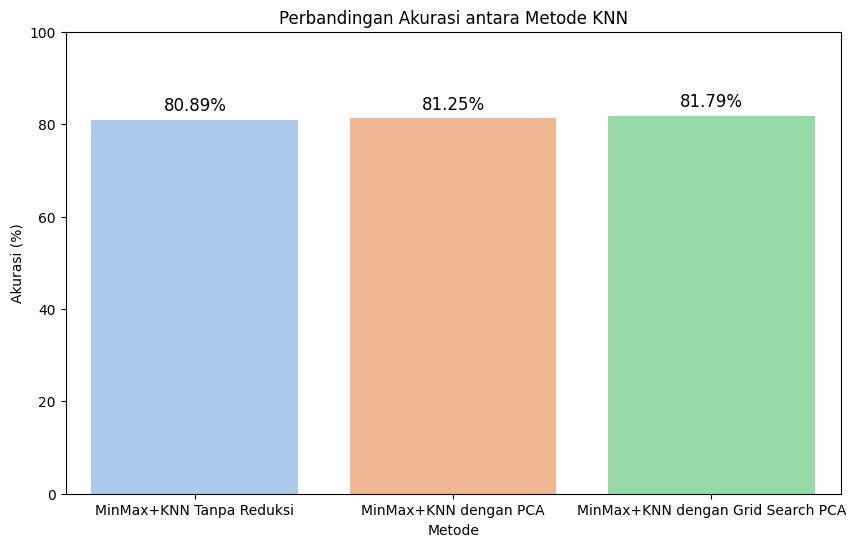

In [ ]:
fiximport seaborn as sns
import matplotlib.pyplot as plt

# Daftar metode yang akan dibandingkan
methods = ['MinMax+KNN Tanpa Reduksi', 'MinMax+KNN dengan PCA', 'MinMax+KNN dengan Grid Search PCA']

# Daftar akurasi dari setiap metode
accuracies = [best_accuracy_knnbiasa, best_accuracy_knn_pca*100, grid_knn_pca*100]

# Membuat dataframe dari data
data = {'Metode': methods, 'Akurasi (%)': accuracies}
df = pd.DataFrame(data)

# Membuat grafik bar dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metode', y='Akurasi (%)', data=df, palette='pastel')
plt.xlabel('Metode')
plt.ylabel('Akurasi (%)')
plt.title('Perbandingan Akurasi antara Metode KNN')
plt.ylim(0, 100)

for index, value in enumerate(accuracies):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center', fontsize=12)

plt.show()
